In [2]:
import cv2
import numpy as np
from pymongo import MongoClient
import os
import gridfs
import io
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
import pymongo
pymongo.__version__

'4.10.1'

In [4]:
def get_image_from_gridfs(name):
    try:
        client = MongoClient('mongodb://localhost:27017/')
        db = client['face_database']
        fs = gridfs.GridFS(db, "faces")

        # Query the GridFS files collection for the filename
        file_metadata = db["faces.files"].find_one({'filename': name})

        if file_metadata:
            # Get the file ID and retrieve the file
            file_id = file_metadata['_id']
            file_data = fs.get(file_id).read()

            # Convert byte data to an image and display
            image = Image.open(io.BytesIO(file_data))
            return image
        else:
            print|(f"No image found in the database for name: {name}.")
            return

    except Exception as e:
        print(f"An error occurred: {e}")
        return

In [8]:
img = get_image_from_gridfs("test")
img_array = np.array(img)

In [9]:
img_array.shape

(172, 134, 3)

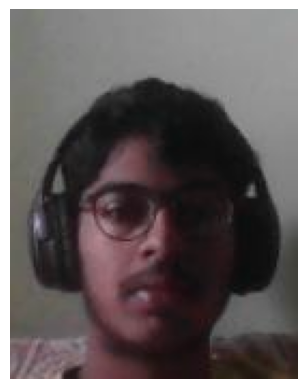

In [10]:
image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(image)

In [11]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

2024-12-29 11:34:06.127899: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-29 11:34:06.149633: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-29 11:34:06.149658: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-29 11:34:06.149675: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-29 11:34:06.153901: I tensorflow/core/platform/cpu_feature_g

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11532028413772650212
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 918618112
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18076563722137841987
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9"
xla_global_id: 416903419
]


2024-12-29 11:34:43.003086: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-29 11:34:43.003342: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-12-29 11:34:43.003466: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf